In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# FOR DETECTING NON_ENGLISH NEWS AND HEADLINES
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
nlp = spacy.load('en_core_web_sm')


def create_lang_detector(nlp, name):
    return LanguageDetector()

Language.factory("language_detector", func=create_lang_detector)

nlp.add_pipe('language_detector', last=True)

In [3]:
df = pd.read_csv("train_news.csv", index_col=0)
df

id                                           headline  \
0       9653  Ethics Questions Dogged Agriculture Nominee as...   
1      10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3       6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4       7596                       A Digital 9/11 If Trump Wins   
...      ...                                                ...   
20795   5671                                                NaN   
20796  14831        Albert Pike and the European Migrant Crisis   
20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 5 columns]

In [4]:
df.isnull().sum() #Checking Null values

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [55]:
df[df['headline'].isnull()].isnull().sum()

id                         0
headline                 558
written_by                 0
news                       0
label                      0
Headline_News              0
Headline_Written_News      0
Length                     0
dtype: int64

In [56]:
df[df['written_by'].isnull()].isnull().sum()

id                          0
headline                    0
written_by               1957
news                       39
label                       0
Headline_News               0
Headline_Written_News       0
Length                      0
dtype: int64

##### Only the null values of column "news" and "written_by" coincide

##### Creating two additional features combining "Headlines" and "News" & combining "Headlines", "News" and "Written_by"

In [5]:
df['Headline_News'] = df['headline'].fillna('') +' '+ df['news'].fillna('')
df

id                                           headline  \
0       9653  Ethics Questions Dogged Agriculture Nominee as...   
1      10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3       6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4       7596                       A Digital 9/11 If Trump Wins   
...      ...                                                ...   
20795   5671                                                NaN   
20796  14831        Albert Pike and the European Migrant Crisis   
20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  \
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0   
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0   
2      Sunday on ABC’s “This Week,” while discussing ...      0   
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0   
4        Finian Cunningham has written extensively on...      1   
...                                                  ...    ...   
20795  No, you'll be a dog licking of the vomit of yo...      1   
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1   
20797  posted by Eddie You know the Dakota Access Pip...      1   
20798  It’s officially summer, and the Society Boutiq...      0   
20799  Emory University in Atlanta, Georgia, has anno...      0   

                                           Headline_News  
0      Ethics Questions Dogged Agriculture Nominee as...  
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...  
2      Cotton to House: ’Do Not Walk the Plank and Vo...  
3      Paul LePage, Besieged Maine Governor, Sends Co...  
4      A Digital 9/11 If Trump Wins   Finian Cunningh...  
...                                                  ...  
20795   No, you'll be a dog licking of the vomit of y...  
20796  Albert Pike and the European Migrant Crisis By...  
20797  Dakota Access Caught Infiltrating Protests to ...  
20798  How to Stretch the Summer Solstice - The New Y...  
20799  Emory University to Pay for ’100 Percent’ of U...  

[20800 rows x 6 columns]

In [6]:
df['Headline_Written_News'] = df['headline'].fillna('') + ' ' + df['written_by'].fillna('') + ' ' + df['news'].fillna('')
df

id                                           headline  \
0       9653  Ethics Questions Dogged Agriculture Nominee as...   
1      10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3       6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4       7596                       A Digital 9/11 If Trump Wins   
...      ...                                                ...   
20795   5671                                                NaN   
20796  14831        Albert Pike and the European Migrant Crisis   
20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  \
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0   
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0   
2      Sunday on ABC’s “This Week,” while discussing ...      0   
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0   
4        Finian Cunningham has written extensively on...      1   
...                                                  ...    ...   
20795  No, you'll be a dog licking of the vomit of yo...      1   
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1   
20797  posted by Eddie You know the Dakota Access Pip...      1   
20798  It’s officially summer, and the Society Boutiq...      0   
20799  Emory University in Atlanta, Georgia, has anno...      0   

                                           Headline_News  \
0      Ethics Questions Dogged Agriculture Nominee as...   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      Cotton to House: ’Do Not Walk the Plank and Vo...   
3      Paul LePage, Besieged Maine Governor, Sends Co...   
4      A Digital 9/11 If Trump Wins   Finian Cunningh...   
...                                                  ...   
20795   No, you'll be a dog licking of the vomit of y...   
20796  Albert Pike and the European Migrant Crisis By...   
20797  Dakota Access Caught Infiltrating Protests to ...   
20798  How to Stretch the Summer Solstice - The New Y...   
20799  Emory University to Pay for ’100 Percent’ of U...   

                                   Headline_Written_News  
0      Ethics Questions Dogged Agriculture Nominee as...  
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...  
2      Cotton to House: ’Do Not Walk the Plank and Vo...  
3      Paul LePage, Besieged Maine Governor, Sends Co...  
4      A Digital 9/11 If Trump Wins Finian Cunningham...  
...                                                  ...  
20795   NeverSurrender No, you'll be a dog licking of...  
20796  Albert Pike and the European Migrant Crisis Ri...  
20797  Dakota Access Caught Infiltrating Protests to ...  
20798  How to Stretch the Summer Solstice - The New Y...  
20799  Emory University to Pay for ’100 Percent’ of U...  

[20800 rows x 7 columns]

#### CHECKING THE LABEL VALUES FOR THE NULL VALUES IN COLUMNS

#### 'headline'

In [8]:
df[df['headline'].isnull()]['label'].value_counts()

1    558
Name: label, dtype: int64

#### 'news'

In [9]:
df[df['news'].isnull()]['label'].value_counts()

1    39
Name: label, dtype: int64

In [10]:
df[df['news'].isnull()]

id                                           headline written_by  \
556     9454  Il saoule tout le monde avec son analyse polit...        NaN   
1642   11486  Pour booster les ventes, Dassault offre un por...        NaN   
1765     573  Le top des recherches Google passe en top des ...        NaN   
1968    9446  Trop essoufflé après avoir cherché ses affaire...        NaN   
2200    3729  Les Américains ne sont plus qu’à quelques heur...        NaN   
3183   13107  Les gardes-frontières se mettent en alerte pou...        NaN   
3927    4358  Ne supportant plus l’ambiance de la campagne é...        NaN   
4333   14499  Primaire – François Fillon se désiste au profi...        NaN   
4746    2148  Gorafi Magazine: Barack Obama « Je vous ai déj...        NaN   
4747    8649  Donald Trump s’excuse pour toutes les minorité...        NaN   
4942   10867    Live Soirée présidentielle US 2016 >> Le Gorafi        NaN   
6849    6215  New-York – Le lâcher de confettis prévu à Time...        NaN   
7100    3329  GuinessBook : 100 millions d’Américains batten...        NaN   
7271   19157  110% des Américains assurent qu’ils continuero...        NaN   
7388   11450  Vladimir Poutine est élu 45e Président des Eta...        NaN   
7727   18757               Donald Trump en 5 dates >> Le Gorafi        NaN   
7951    2169  #NDDL: Pour fêter l’autorisation des travaux, ...        NaN   
8535   12835  [Vidéo] Découvrez le Gorafi de l’Année 2017 >>...        NaN   
9719    9524  Elections US : les premières estimations donne...        NaN   
10690  16126  Vendée Globe – Un skipper fait demi-tour après...        NaN   
11784  14933  La sortie du dernier livre inédit du Gorafi éc...        NaN   
11850  19388  Heureux et souriant, il a la chance de toujour...        NaN   
11937   4288            Hillary Clinton en 5 dates >> Le Gorafi        NaN   
12315  10466  Sur Twitter, Donald Trump se félicite d’avoir ...        NaN   
13452    142  Gorafi Magazine : Entretien exclusif avec Bara...        NaN   
14178  13020         Horoscope du 21 novembre 2016 >> Le Gorafi        NaN   
15235   1911  Grand-Prix du Brésil – Romain Grosjean obtient...        NaN   
16078   2793  «Pourquoi je suis candidat à la présidentielle...        NaN   
16690   8922  La Trump Tower cambriolée – les voleurs seraie...        NaN   
16863   1200  La Corée du Nord annonce avoir envoyé un missi...        NaN   
16884  13915  Elle met en fuite un braqueur en lui jetant de...        NaN   
16901  18479  Il se fait cryogéniser dans l’espoir de voir u...        NaN   
18470  19227  Des millions d’Américains recherchent massivem...        NaN   
18512  12056  Après le succès de « Mariés au premier regard ...        NaN   
18683  12460  La voyante lisait l’avenir dans les cartes ble...        NaN   
19436   6680  Débat Primaire de la Droite : les Français pas...        NaN   
19507   8908  “Notre batal a coulé” par l’homme qui fait des...        NaN   
20512   9350  La Russie a profité de l’élection américaine p...        NaN   
20603   5717  SPA : Enfermé depuis trois jours dans une cage...        NaN   

      news  label                                      Headline_News  \
556    NaN      1  Il saoule tout le monde avec son analyse polit...   
1642   NaN      1  Pour booster les ventes, Dassault offre un por...   
1765   NaN      1  Le top des recherches Google passe en top des ...   
1968   NaN      1  Trop essoufflé après avoir cherché ses affaire...   
2200   NaN      1  Les Américains ne sont plus qu’à quelques heur...   
3183   NaN      1  Les gardes-frontières se mettent en alerte pou...   
3927   NaN      1  Ne supportant plus l’ambiance de la campagne é...   
4333   NaN      1  Primaire – François Fillon se désiste au profi...   
4746   NaN      1  Gorafi Magazine: Barack Obama « Je vous ai déj...   
4747   NaN      1  Donald Trump s’excuse pour toutes les minorité...   
4942   NaN      1   Live Soirée présidentielle US 2016 >> Le Gorafi    
6849   NaN      1  New-Yo

#### 'written_by'

In [11]:
len(df['written_by'].unique()) #No. of unique writers

4202

In [12]:
df[df['written_by'].isnull()]['label'].value_counts()

1    1931
0      26
Name: label, dtype: int64

In [13]:
df[df['written_by'].isnull()][df[df['written_by'].isnull()]['label']==0]

id                                           headline written_by  \
244    13993  Full Transcript and Video: Trump Picks Neil Go...        NaN   
1894   17993  California Today: Airbnb, a Hometown Success (...        NaN   
1954   15876  9 New Books We Recommend This Week - The New Y...        NaN   
2583    5911  Keep Your Family Close and Your Roomba Closer ...        NaN   
2703   14228  Transcript: President Obama on What Books Mean...        NaN   
2798   15893  Reaction to a Supreme Court Tie on Immigration...        NaN   
2863    7032  Reactions to the Supreme Court Ruling on Texas...        NaN   
3041   12729  The Best and Worst of the Golden Globes - The ...        NaN   
5272   10204  Full Transcript and Video: Trump News Conferen...        NaN   
5474    3675  2 TV Shows, 4 Books and 7 Viral Videos for You...        NaN   
7354     685  The New York Times to Offer Open Access on Web...        NaN   
8370   19265                     My Canada - The New York Times        NaN   
9328    2785    How the Poll Was Conducted - The New York Times        NaN   
10772   8397    Fran Lebowitz: By the Book - The New York Times        NaN   
11198  17837  At the Tonys, Moments to Remember - The New Yo...        NaN   
11636  13995  To Our Readers, From the Publisher and Executi...        NaN   
12088   5608  As Hurricane Matthew Nears U.S., Residents Get...        NaN   
12570      8  Excerpts From a Draft Script for Donald Trump’...        NaN   
12669   3470  ‘My First Gay Bar’: Rachel Maddow, Andy Cohen ...        NaN   
12781  17943  Hurricane Matthew Avoids Direct Hit on Florida...        NaN   
13306  13267  Notes From Aleppo: Intimate Glimpses of War-Ra...        NaN   
16861  19704     100 Notable Books of 2016 - The New York Times        NaN   
18914  16403           Grammy Winners 2017 - The New York Times        NaN   
19800   3203  37 Who Saw Murder Didn’t Call the Police - The...        NaN   
20304   5239  Text of F.B.I. Director’s Remarks on Investiga...        NaN   
20315  11986  Hurricane Matthew Approaches Florida Governor ...        NaN   

                                                    news  label  \
244    President Trump announced on Tuesday that Neil...      0   
1894   Good morning. This is the last day of our test...      0   
1954   I know, the number of big books out each fall ...      0   
2583   How lovable can a robot be? A study of Roomba ...      0   
2703   Michiko Kakutani, the chief book critic for Th...      0   
2798   The Supreme Court’s   vote in a major immigrat...      0   
2863   In a major abortion ruling Monday, the Supreme...      0   
3041   Here’s a look at the most memorable moments fr...      0   
5272   President Trump on Thursday announced his new ...      0   
5474   Summer’s almost over. Here’s a cultural diet f...      0   
7354   The New York Times is inviting readers to take...      0   
8370   Canada, our No. 1 pick for this year’s 52 Plac...      0   
9328   The latest New York   News Poll is based on te...      0   
10772  The humorist and social commentator says her i...      0   
11198  In a Tony Awards night shadowed by the tragedy...      0   
11636  When the biggest political story of the year r...      0   
12088  • Hurricane Matthew, a deadly storm with maxim...      0   
12570  Donald J. Trump is scheduled to make a highly ...      0   
12669  For generations of gays and lesbians, especial...      0   
12781  Hurricane Matthew churned north along the coas...      0   
13306  Declan Walsh, our bureau chief in Cairo, is in...      0   
16861  The year’s notable fiction, poetry and nonfict...      0   
18914  The complete list of winners: Record of the Ye...      0   
19800  For more than half an hour 38 respectable, law...      0   
20304  Following is the prepared text of remarks by D...      0   
20315  Read Friday’s Storm Watch for the latest updat...      0   

                                           Headline_News  \
244    Full Transcript and Video:

In [14]:
dict(df[df['label']==1]['written_by'].value_counts())

{'admin': 193,
 'Pakalert': 86,
 'Eddy Lavine': 85,
 'Starkman': 84,
 'Gillian': 82,
 'Alex Ansary': 82,
 'Editor': 81,
 'noreply@blogger.com (Alexander Light)': 80,
 'Dave Hodges': 77,
 'Anonymous': 77,
 'IWB': 75,
 'BareNakedIslam': 74,
 'The European Union Times': 74,
 'Activist Post': 72,
 'EdJenner': 69,
 'The Doc': 69,
 'Henry Wolff': 67,
 'Mac Slavo': 66,
 'Iron Sheik': 66,
 'Kaitlyn Stegall': 65,
 'noreply@blogger.com (Der Postillon)': 64,
 'Jason Ditz': 64,
 'Heather Callaghan': 62,
 'David Stockman': 61,
 'Geoffrey Grider': 61,
 'King World News': 60,
 'shorty': 58,
 'Consortiumnews.com': 58,
 'The Saker': 55,
 '-NO AUTHOR-': 54,
 'Dikran Arakelian (noreply@blogger.com)': 51,
 'wmw_admin': 51,
 'Amy Moreno': 48,
 'Daniel Greenfield': 47,
 'Andrew Anglin': 47,
 'stevew': 45,
 'Howard Portnoy': 44,
 'Jafe Arnoldski (noreply@blogger.com)': 44,
 'pcr3': 42,
 'Admin': 41,
 'Arnold Monteverde (noreply@blogger.com)': 41,
 'beforeitsnews.com': 40,
 'Mike Rivero': 39,
 'The Conservati

#### Most null values in columns indicate fake news

### CHECKING NON-ENGLISH NEWS

In [16]:
def lang_detect(text):
    doc = nlp(text)
    return doc._.language['language']

In [17]:
j = 0
ind = []
uniq_lang = {}
for i in df.loc[:,'Headline_Written_News']:
    lang = lang_detect(i)
    if lang !='en':
        ind.append(j)
        
    if lang in uniq_lang:
        uniq_lang[lang] += 1
    else:
        uniq_lang[lang] = 1
    j=j+1
len(ind)

535

In [18]:
df.loc[ind,:]['label'].value_counts()

1    534
0      1
Name: label, dtype: int64

##### All non-english news except one are fake

In [19]:
uniq_lang

{'en': 20265,
 'ar': 19,
 'es': 140,
 'ru': 156,
 'de': 96,
 'fr': 70,
 'no': 7,
 'af': 3,
 'pt': 7,
 'id': 1,
 'el': 2,
 'da': 2,
 'zh-cn': 1,
 'hr': 3,
 'pl': 2,
 'ca': 2,
 'so': 2,
 'it': 6,
 'tr': 7,
 'sv': 1,
 'cy': 2,
 'nl': 5,
 'sw': 1}

In [57]:
len(uniq_lang)

23

##### There are 23 unique languages in the dataset
##### Russian is the most common non english language

### CLEANING THE TEXT

In [20]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [21]:
def remove_contractions(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)   
    

    return text

In [22]:
def remove_chars(text):
     # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text,flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.strip()
    
    return text

In [23]:
def remove_stopwords(text):
    # Remove stop words
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    return text

In [24]:
def lemmatization(text):
    # Lemmatization
    lema = WordNetLemmatizer()
    text = text.split()
    text = [lema.lemmatize(w) for w in text]
    text = " ".join(text)
    
    return text

In [25]:
df['Headline_Written_News'] = df.apply(lambda row : remove_contractions(row['Headline_Written_News']), axis=1)
print("Contractions expanded.")

df['Headline_Written_News'] = df.apply(lambda row : remove_chars(row['Headline_Written_News']), axis=1)
print("Unwanted Characters Removed.")

Contractions expanded.
Unwanted Characters Removed.


In [26]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

# Adding stopwords from other available languages
for i in ['arabic','danish', 'german', 'greek', 'spanish', 'french', 'indonesian', 'italian', 'dutch', 'norwegian', 'portuguese', 'russian', 'swedish', 'turkish']:
    temp = set(stopwords.words(i))
    for j in temp:
        stops.add(j)
stops

df['Headline_Written_News'] = df.apply(lambda row : remove_stopwords(row['Headline_Written_News']), axis=1)
print("Stopwords Removed.")

Stopwords Removed.


In [27]:
df['Headline_Written_News'] = df.apply(lambda row : lemmatization(row['Headline_Written_News']), axis=1)
print("Lemmatization completed.")

Lemmatization completed.


In [28]:
# Adding a new feature Length - indicating the length of the cleaned independant variable
df['Length'] = df.apply( lambda row : len(row['Headline_Written_News']) ,axis=1)
df

id                                           headline  \
0       9653  Ethics Questions Dogged Agriculture Nominee as...   
1      10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3       6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4       7596                       A Digital 9/11 If Trump Wins   
...      ...                                                ...   
20795   5671                                                NaN   
20796  14831        Albert Pike and the European Migrant Crisis   
20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  \
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0   
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0   
2      Sunday on ABC’s “This Week,” while discussing ...      0   
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0   
4        Finian Cunningham has written extensively on...      1   
...                                                  ...    ...   
20795  No, you'll be a dog licking of the vomit of yo...      1   
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1   
20797  posted by Eddie You know the Dakota Access Pip...      1   
20798  It’s officially summer, and the Society Boutiq...      0   
20799  Emory University in Atlanta, Georgia, has anno...      0   

                                           Headline_News  \
0      Ethics Questions Dogged Agriculture Nominee as...   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      Cotton to House: ’Do Not Walk the Plank and Vo...   
3      Paul LePage, Besieged Maine Governor, Sends Co...   
4      A Digital 9/11 If Trump Wins   Finian Cunningh...   
...                                                  ...   
20795   No, you'll be a dog licking of the vomit of y...   
20796  Albert Pike and the European Migrant Crisis By...   
20797  Dakota Access Caught Infiltrating Protests to ...   
20798  How to Stretch the Summer Solstice - The New Y...   
20799  Emory University to Pay for ’100 Percent’ of U...   

                                   Headline_Written_News  Length  
0      ethic question dogged agriculture nominee geor...    5300  
1      must deep stop argentina lionel messi new york...    3945  
2      cotton house walk plank vote bill cannot pas s...     336  
3      paul lepage besieged maine governor sends conf...    4399  
4      digital trump win finian cunningham finian cun...    6523  
...                                                  ...     ...  
20795      neversurrender licking vomit chinese overlord      45  
20796  albert pike european migrant crisis rixon stew...    4327  
20797  dakota access caught infiltrating protest inci...    2561  
20798  stretch summer solstice new york time alison c...    1638  
20799  emory university pay percent undocumented stud...    1495  

[20800 rows x 8 columns]

In [29]:
def add_dict(text):
    # Adding words to dictionary
    text = text.split()
    for word in text:
        if word in dictionary:
            dictionary[word]+=1
        else:
            dictionary[word]=1

In [30]:
dictionary = {}
df['Headline_Written_News'].apply(add_dict)
print("Dictionary Complete.")
len(dictionary)

Dictionary Complete.


133230

In [31]:
# Cheecking the count of words that have frequency greater than the threshold
count = 0
threshold = 15
feature_count = 0
delete = []
for word, count in dictionary.items():
    if count > threshold:
      feature_count+=1
    else:
      delete.append(word)
feature_count

25535

In [32]:
for i in delete:
  dictionary.pop(i)
len(dictionary)

25535

In [33]:
# Most commonly used words
print(sorted(dictionary.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)) 

[('said', 79688), ('mr', 71398), ('trump', 59248), ('one', 39587), ('state', 37759), ('would', 36866), ('new', 36733), ('time', 36687), ('people', 35980), ('year', 33149), ('clinton', 28794), ('like', 26243), ('president', 26051), ('american', 22473), ('u', 19746), ('could', 19219), ('many', 18809), ('even', 18488), ('day', 17909), ('government', 17727), ('country', 17368), ('two', 17342), ('first', 17178), ('say', 17049), ('world', 15974), ('obama', 15504), ('hillary', 15424), ('news', 15271), ('last', 15154), ('election', 15143), ('make', 15139), ('get', 14968), ('york', 14950), ('united', 14949), ('right', 14938), ('way', 14286), ('campaign', 13522), ('may', 13251), ('know', 13037), ('house', 12912), ('m', 12632), ('woman', 12594), ('white', 12513), ('republican', 12436), ('official', 12245), ('going', 12233), ('group', 12179), ('think', 12060), ('made', 11921), ('medium', 11885), ('back', 11873), ('take', 11806), ('law', 11514), ('work', 11487), ('much', 11461), ('life', 11402), ('

### EDA

In [34]:
plt.figure(figsize=(6,6))
ax = sns.countplot(df['label'])
ax.set_title('Label', fontsize=14)
ax.set_xlabel('')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, color='red', ha='center', va='bottom')
plt.tight_layout()

* The dataset contains almost equal amounts of Original and fake news 

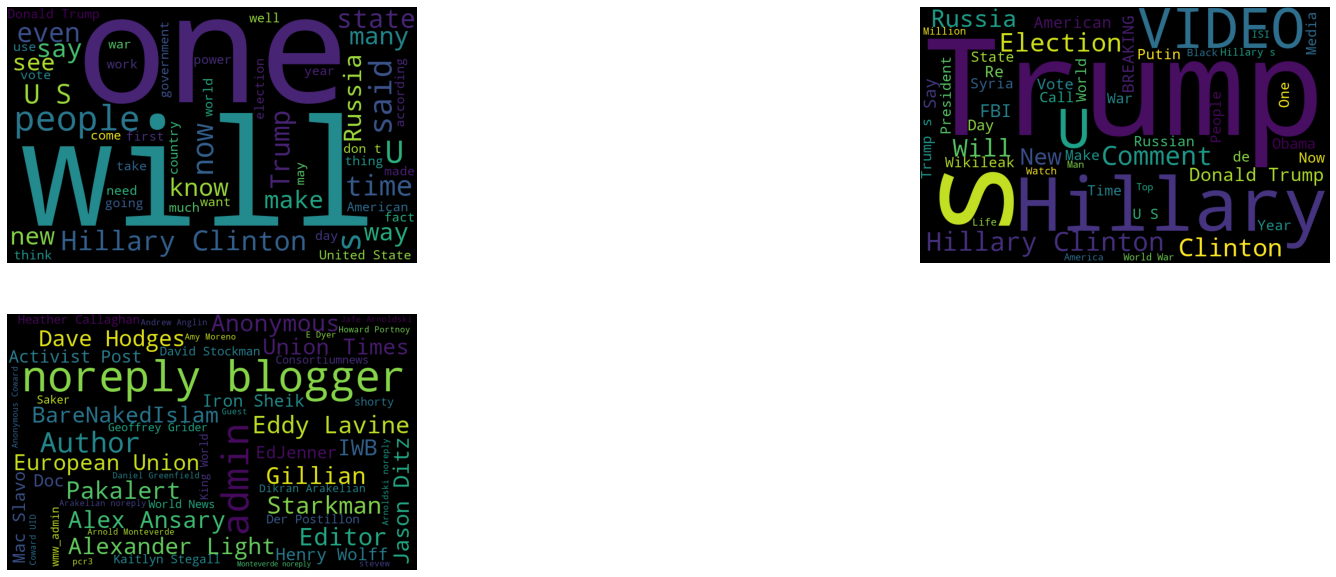

In [35]:
# Getting the most commonly used words in fake news for all three columns
from wordcloud import WordCloud
j=1
plt.figure(figsize=(30,16))
for i in ['news', 'headline', 'written_by']:
  plt.subplot(3,2,j)
  j=j+1
  hams = df[df['label']==1][i].fillna(' ')
  spam_cloud = WordCloud(width=800,height=500,max_words=50).generate(' '.join(hams))
  plt.imshow(spam_cloud)
  plt.axis('off')
plt.show()

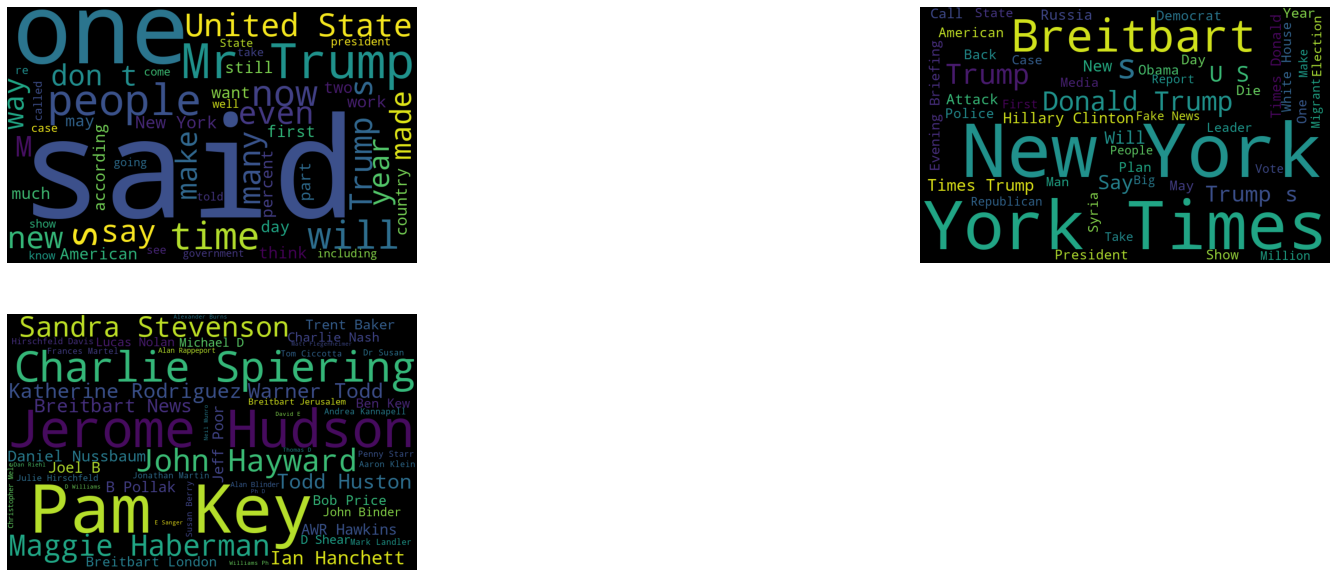

In [36]:
# Getting the most commonly used words in non-fake news for all three columns
from wordcloud import WordCloud
j=1
plt.figure(figsize=(30,16))
for i in ['news', 'headline', 'written_by']:
  plt.subplot(3,2,j)
  j=j+1
  hams = df[df['label']==0][i].fillna(' ')
  spam_cloud = WordCloud(width=800,height=500,max_words=50).generate(' '.join(hams))
  plt.imshow(spam_cloud)
  plt.axis('off')
  # plt.tight_layout(pad=0)
plt.show()

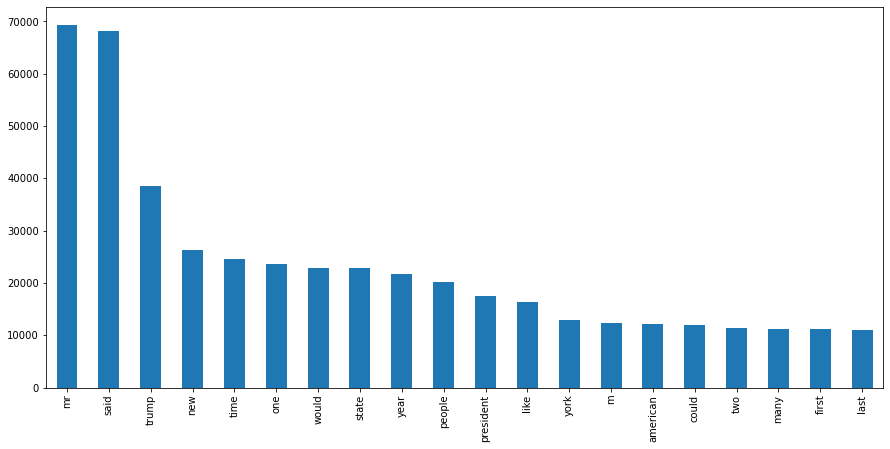

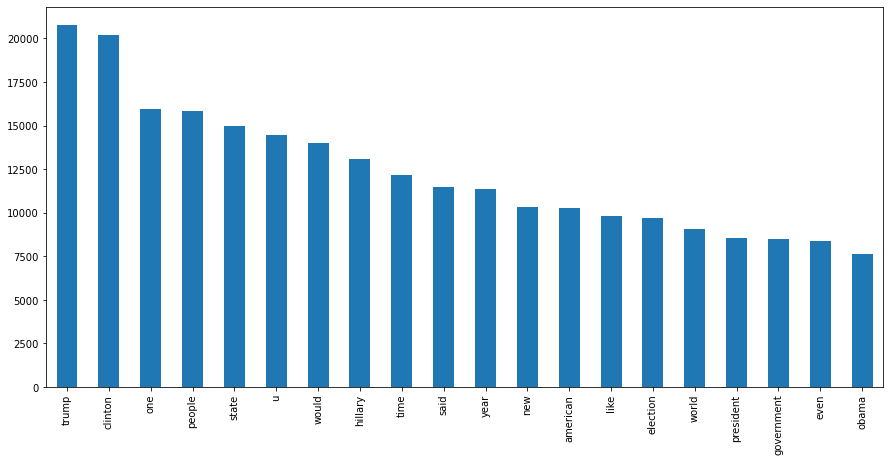

In [37]:
# Getting the most commonly used words in fake and non-fake news in the combined and cleaned text column
orig = df[df["label"] == 0]["Headline_Written_News"]
fake = df[df["label"] == 1]["Headline_Written_News"]
temp = [orig,fake]

for i in range(2):
    plt.figure(figsize=(15,7))
    pd.Series(' '.join([j for j in temp[i]]).split()).value_counts().head(20).plot(kind="bar")
    plt.show()

* "mr" is the most commonly used word in non-fake news
* "trump" is the most commonly used word in fake news

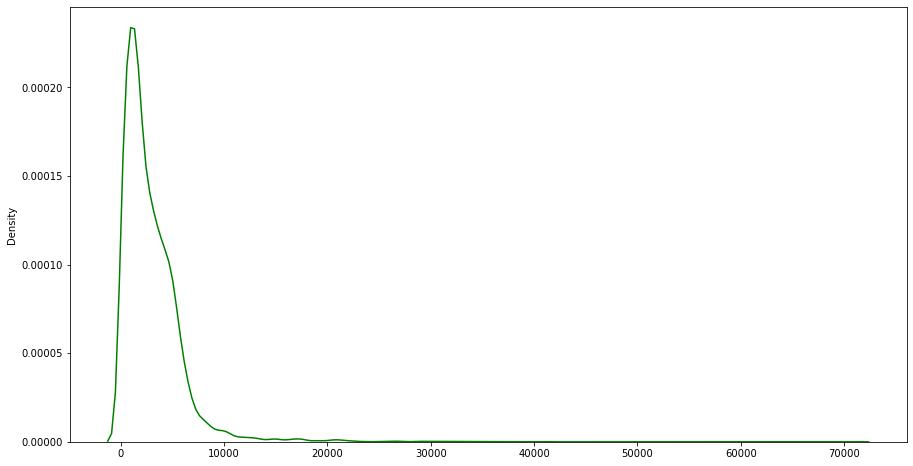

In [38]:
plt.figure(figsize=(15,8))
ax = sns.distplot(x=df['Length'], color = 'green', hist=False)
plt.show()

* The 'Length' column is right Skewed

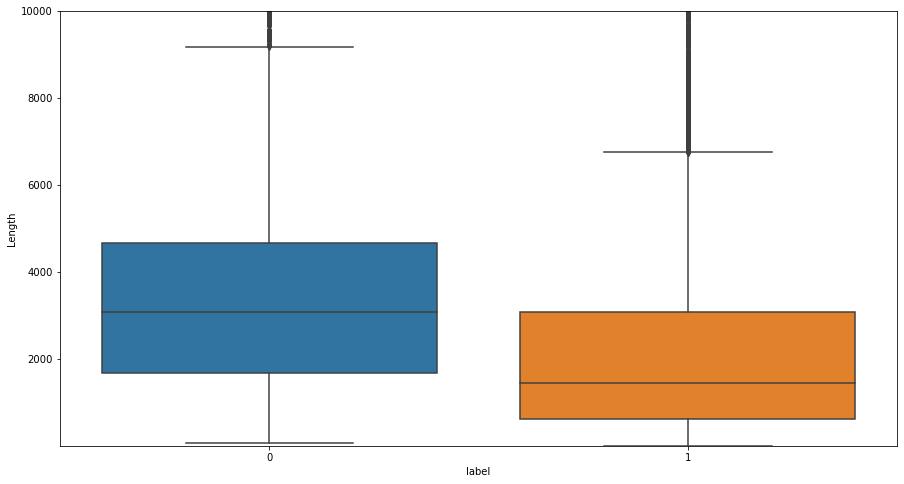

In [39]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df['label'], y=df['Length'])
plt.ylim(5, 10000)
plt.show()

* The boxplot shows that fake news is shorter in length compared to authentic news.

### MODEL BUILDING

In [40]:
# Independent Variable
x = df['Headline_Written_News']
# Dependent Variable
y = df['label']

In [41]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.20)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initializing the Tfidf vectorizer with maximum of 30000 features and with ngram range of (1,3)
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,3), analyzer='word', max_features=30000)
tfidf_vect_ngram.fit(x)
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Initializing the models and their parameters
models = {
    "Logistic Regression" : {'model':LogisticRegression(),
                             'params':{'penalty' :['l1', 'l2', 'elasticnet'],
                                       'solver':['newton-cg'],
                                       'multi_class' :['multinomial']
                                      },
                            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
    "Passive Aggressive" : {'model':PassiveAggressiveClassifier(max_iter=20),
                           'params':{'c':[0.25,0.5,0.75],
                                     'max_iter' : [20,50,80]
                                    }
                           },
    "Random Forest" : {'model':RandomForestClassifier(),
                       'params':{'n_estimators':[50,100],
                                 'max_depth':[5,8,50], 
                                 'min_samples_leaf':[2,5,10]
                                }
                      },
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            },
    "MultinomialNB" : {'model':MultinomialNB(),
                    'params':{'alpha': [1.0,0.6, 0.3]
                             }
                    }
}

In [44]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    best_model_scr = 0
    
    j['model'].fit(x_train,y_train)
    pred_test = j['model'].predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  LogisticRegression()
Score :  0.9605769230769231
-------------------------------------------------------------------------------------------
Model :  DecisionTreeClassifier()
Score :  0.9730769230769231
-------------------------------------------------------------------------------------------
Model :  PassiveAggressiveClassifier(max_iter=20)
Score :  0.9730769230769231
-------------------------------------------------------------------------------------------
Model :  RandomForestClassifier()
Score :  0.9716346153846154
-------------------------------------------------------------------------------------------
Model :  KNeighborsClassifier()
Score :  0.5788461538461539
-------------------------------------------------------------------------------------------
Model :  MultinomialNB()
Score :  0.9334134615384615
-------------------------------------------------------------------------------------------
---------------------------------------------------------------------------

In [47]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(models['Decision Tree']['model'], 
                    models['Decision Tree']['params'], 
                    cv=4, scoring = 'accuracy')

grid.fit(x_train,y_train)
print({
    'model': 'Decision Tree',
    'best_score' : grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'Decision Tree', 'best_score': 0.9528245192307692, 'best_params': {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 50}}


In [48]:
# Evaluating the model
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
decisiontree = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=50)
decisiontree.fit(x_train,y_train)
y_pred = decisiontree.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification Report : ")
print(classification_report(y_test,y_pred))

Accuracy Score :  0.9533653846153847
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2071
           1       0.94      0.97      0.95      2089

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160



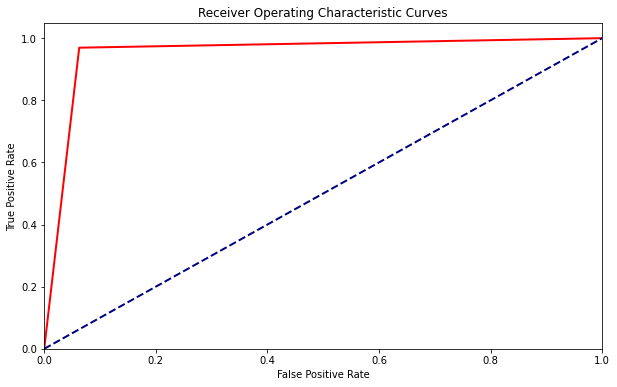

In [49]:
# Plotting the ROC-CURVE
plt.figure(figsize=(10,6))
x = roc_curve(y_test, y_pred,pos_label = True)
plt.plot(x[0], x[1], color='red', lw=2) # Plotting the curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Plotting the line through the origin
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

<AxesSubplot:>

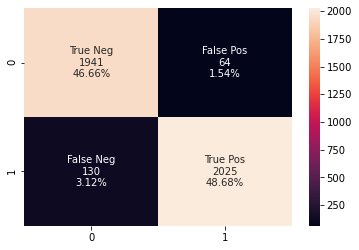

In [53]:
# Confussion Matrix
cf_matrix = confusion_matrix(y_pred, y_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [54]:
# Saving the model
import joblib
joblib.dump(decisiontree,"Fake_News_Decision_Tree_classifier.pkl")

['Fake_News_Decision_Tree_classifier.pkl']

In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.9542884071630536
0.9396751740139211
0.9532958619093969
